# Исследование сервиса по аренде электросамокатов

## Описание проекта

Перед нами данные о некоторых пользователях сервиса по аренде самокатов из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса пользуются мобильным приложением.
Сервисом можно пользоваться:
 - **без подписки** - абонентская плата отсутствует;
стоимость одной минуты поездки 8 рублей; стоимость старта (начала поездки) 50 рублей;
 - **с подпиской Ultra** - абонентская плата 199 рублей в месяц; стоимость одной минуты поездки 6 рублей;
стоимость старта бесплатно.

## Описание данных

В нашем распоряжении три файла о *пользователях* (имя, идентификатор пользователя, возраст, город, тип подписки), *поездках* (идетнификатор, расстояние, продолжительность, дата) и *подписках* (тип подписки, стоимость начала поездки, стоимость минуты, стоимость ежемесячного платежа).

### План работы

1. Ознакомиться с данными.
2. Привести нужные данные к удобному виду.
3. Создать новый столбец с месяцем.
4. Проверить наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.
5. Описать и визуализировать общую информацию.
6. Объединить данные из трех таблиц.
7. Разделить таблицы по нужному критерию.
8. Визуализировать данные.
9. Найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
10. Добавить столбец с помесячной выручкой, которую принёс каждый пользователь.
11. Проверить гипотезы.
12. Подвести итоги работы.

# Шаг 1. Загрузка данных

In [59]:
#загрузка библиотек
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st

In [60]:
#чтение файлов данных
data_users = pd.read_csv('datasets/statistical_analisys_of_scooter_rent_users.csv')
data_subs = pd.read_csv('datasets/statistical_analisys_of_scooter_rent_subscriptions.csv')
data_rides = pd.read_csv('datasets/statistical_analisys_of_scooter_rent_rides.csv')



## Изучение общей информации

In [61]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [62]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Датафрейм содержит информацию с иденетификатором пользователя, именем пользователя, возрастом, городом (использования самоката скорее всего), типом подписки на сервис. Количество строк в датафрейме **1565**. Типы данных в столбцах:
* *идентификатор* *пользователя* - целочисленные значения,

* *имя* - текстовые значения,

* *возраст* - числовые,

* *город* - текстовые,

* *тип* *подписки* - текстовые

In [63]:
data_subs.head()


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [64]:
data_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


В датафрейме содерижтся информация о подписках, ценах и различных стоимостях в следующем виде:

*   тип подписки с нечисловыми значениями
*   стоимость одной минуты поездки по соответствующей подписке с целочисленными значениями
*   стоимость начала поездки с целочисленными значениями
*   стоимость ежемесячного платежа с целочисленными значениями

In [65]:
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [66]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Датафрейм содержит в себе информацию о поездках пользователей сервиса
*  идетификатор пользователя с целочисленным типом данных
*  расстояние, которое пользователь проехал в текущей сессии (в метрах, *как указано в описании проекта*) с типом float
*  продолжительность сессии (в минутах *как указано в описании проекта*) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
*  дата совершения поездки с типом object, который мы на этапе переработки приведём к datetime

## Предобработка данных

### Столбец date к типу даты в pandas

In [67]:
# меняем тип данных в столбце с датой
data_rides['date'] = pd.to_datetime(data_rides['date'])

In [68]:
# проверяем
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Создание столбца с номером месяца на основе столбца date.

In [69]:
# Проверка, за один ли год данные
data_rides['date'].dt.year.unique()

array([2021], dtype=int32)

In [70]:
data_rides['month'] = data_rides['date'].dt.month

In [71]:
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Проверка наличия пропущенных значений и дубликатов в датафреймах и их обработка, если таковые значения имеются

#### Пропуски

In [72]:
# функция для подсчета пропусков
def count_nulls(df):
    return df.isnull().sum()
count_nulls(data_subs)
count_nulls(data_users)
count_nulls(data_rides)

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропусков не обнаружено

Поскольку **повторения** имен, дат, возраста и даты вполне **логичны**, проверим нет ли дублирующихся строк изходя из данных по расстоянию и продолжительности сессии

In [73]:
#смотрим колонку с дистанцией
data_rides['distance'].duplicated().unique()

array([False])

одинаковых расстояний нет

In [74]:
data_rides['duration'].duplicated().unique()

array([False,  True])

повторения есть по продолжительности сессии, найдём эти строки

In [75]:
data_rides[data_rides['duration'].duplicated()]

,user_id,distance,duration,date,month
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
6860,724,6225.520342,0.5,2021-12-16,12
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Длительность сессии меньше минуты, при пройденных расстояниях от 4 до 6 км, что невозможно в принципе, делаем вывод, что время указано некорректно. Таких строк 94 из 18 тысяч, поскольку общей аналитической картины эти данные не изменят, принимаем решение их удалить.

In [76]:
data_rides = data_rides[data_rides['duration'] != 0.5]

In [77]:
# проверяем
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17973 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17973 non-null  int64         
 1   distance  17973 non-null  float64       
 2   duration  17973 non-null  float64       
 3   date      17973 non-null  datetime64[ns]
 4   month     17973 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 772.3 KB


In [78]:
duplicates_users = data_users[data_users.duplicated(keep=False)] # проверяем дубликаты в таблице с инормацией о пользователях

if duplicates_users.empty:
    print("Нет полных дубликатов строк.")
else:
    print("Обнаружены полные дубликаты:")
    print(duplicates_users)

Обнаружены полные дубликаты:
      user_id      name  age            city subscription_type
15         16    Амалия   27       Краснодар             ultra
42         43  Стефания   22            Омск             ultra
46         47      Юрий   28          Тюмень             ultra
71         72    Никита   25          Москва             ultra
107       108     Влада   29          Тюмень             ultra
...       ...       ...  ...             ...               ...
1560      829     Федор   29       Пятигорск              free
1561      809      Юрий   26            Сочи              free
1562      307    Ясмина   19       Краснодар             ultra
1563       47      Юрий   28          Тюмень             ultra
1564     1045   Артемий   28  Ростов-на-Дону              free

[62 rows x 5 columns]


In [79]:
# удаляем дубликаты и пересчитываем индексы
data_users = data_users.drop_duplicates(ignore_index=True)


In [80]:
# проверяем наличие дубликатов после удаления
duplicates_users = data_users[data_users.duplicated(keep=False)]

if duplicates_users.empty:
    print("Нет полных дубликатов строк.")
else:
    print("Обнаружены полные дубликаты:")
    print(duplicates_users)

Нет полных дубликатов строк.


In [81]:
duplicates_rides = data_rides[data_rides.duplicated(keep=False)] # проверяем дубликаты в таблице с информацией о поездках

if duplicates_rides.empty:
    print("Нет полных дубликатов строк.")
else:
    print("Обнаружены полные дубликаты:")
    print(duplicates_rides)


Нет полных дубликатов строк.


Проверять таблицу с информацией о подписках нет смысла, поскольку в ней две строки и наличие или отсутствие дубликатов было очевидно на этапе изучения общей информации

**Вывод**

Данные в столбце с датой приведены к типу `datetime`, создан столбец с номером месяца на основе данных столбца **date**, найденные полные дубликаты в таблице с инфорацией о пользователях были удалены

## Исследовательский анализ данных

### Частота встречаемости городов

In [82]:
#считаем пользователей по городам
count_users_by_city = data_users['city'].value_counts().sort_values(ascending=False)
count_users_by_city

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

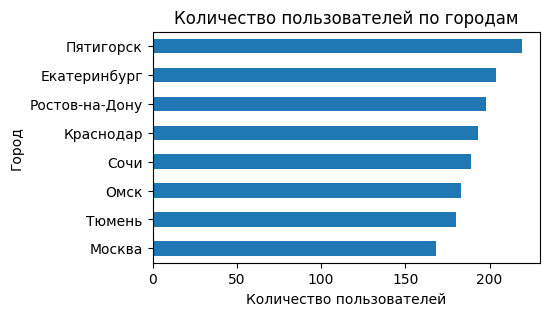

In [83]:
plt.figure(figsize=(5, 3))
count_users_by_city.plot(kind='barh')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.title('Количество пользователей по городам')
plt.gca().invert_yaxis()
plt.show()

Чаще всего встречается город Пятигорск, реже всего Москва. Данные распределены равномерно.

### Соотношение пользователей с подпиской и без подписки

In [84]:
count_sub = data_users['subscription_type'].value_counts()
count_sub

subscription_type
free     835
ultra    699
Name: count, dtype: int64

<Axes: title={'center': 'Процентное соотношение пользователей в зависимости от тарифа'}>

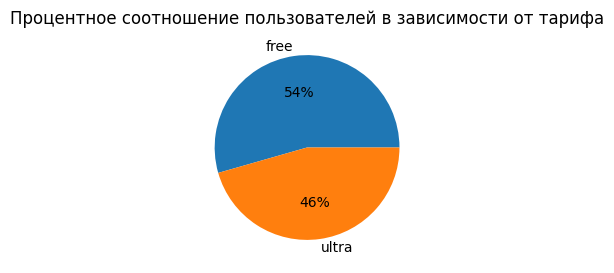

In [85]:
data_users['subscription_type'].value_counts().plot(
    kind = 'pie',
    y = count_sub,
    autopct = '%1.0f%%',
    figsize=(3,3),
    title = 'Процентное соотношение пользователей в зависимости от тарифа', ylabel='')

### Возраст пользователей

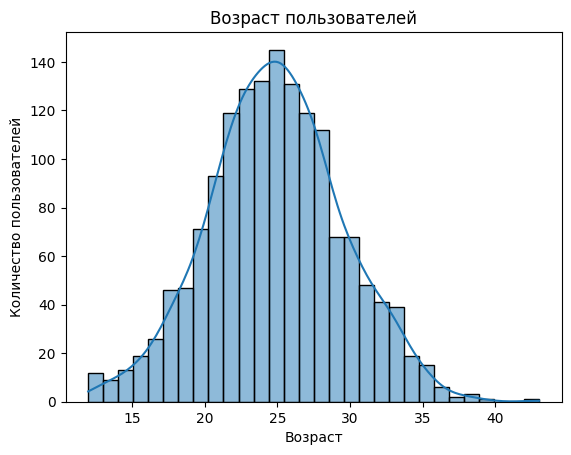

In [86]:
sns.histplot(data=data_users, x='age', kde=True).set(title='Возраст пользователей', xlabel='Возраст', ylabel='Количество пользователей')
plt.show()

Данные распределены нормально. Пик приходится на возраст от 24 до 27 лет

### Расстояние, которое пользователь преодолел за одну поездку

In [87]:
data_rides['distance'].describe()

count    17973.000000
mean      3059.863833
std       1108.814612
min          0.855683
25%       2538.839628
50%       3129.029255
75%       3762.636244
max       7066.003772
Name: distance, dtype: float64

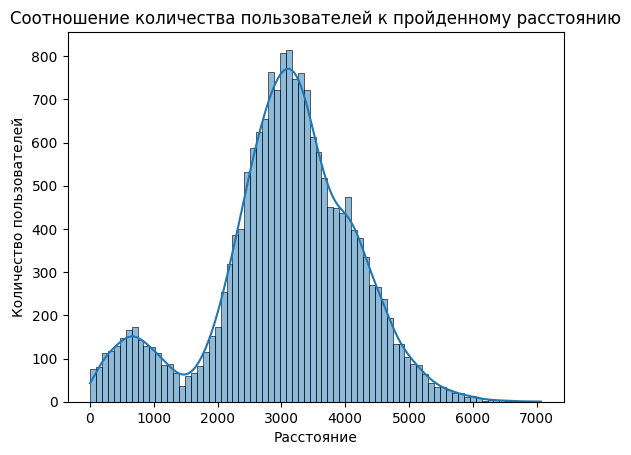

In [88]:
sns.histplot(data=data_rides, x='distance', kde=True)
plt.title('Соотношение количества пользователей к пройденному расстоянию')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show(block=False)

In [89]:
# топ-10 максимальных расстояний
round(data_rides['distance'].sort_values(ascending=False), 2).head(10)

16484    7066.00
15580    6908.49
17171    6760.94
10341    6671.97
12086    6538.94
10915    6535.39
11319    6503.60
11189    6456.42
8527     6436.63
7913     6427.05
Name: distance, dtype: float64

Ничего необычного не наблюдается.

### Продолжительность поездок

In [90]:
data_rides['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

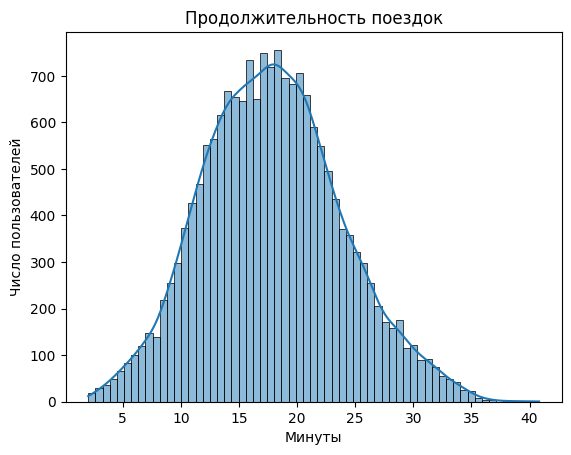

In [91]:
sns.histplot(data=data_rides, x='duration', kde=True)

plt.title('Продолжительность поездок')
plt.xlabel('Минуты')
plt.ylabel('Число пользователей')
plt.show()

Данные распределены нормально. В среднем сервис используется 17 минут, максимальноое время использования 40 минут, минимальное время две минуты

### Общий вывод по исследовательскому анализу

Данные по всем аспектам распределены нормально, выбросы отсутствуют. Приблизительный портрет среднего пользователя следующий:
> Человек от 22 до 30 лет, проезжающий в среднем рассотяние в 3 км за 17 минут.

## Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм методом merge().

In [92]:
data_united = data_users.merge(data_rides, left_on='user_id', right_on='user_id')
data_united = data_united.merge(data_subs, left_on='subscription_type', right_on='subscription_type')

In [93]:
data_united.head(2)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199


In [94]:
data_check = [data_united, data_rides, data_users, data_subs]
for i, data in enumerate(data_check):
    rows = data.shape[0]
    print(f"Количество строк в таблице {i + 1}: {rows}")

Количество строк в таблице 1: 17973
Количество строк в таблице 2: 17973
Количество строк в таблице 3: 1534
Количество строк в таблице 4: 2


### Создание ещё двух датафреймов из датафрейма, созданного на предыдущем этапе:

#### Без подписки (**free**)

In [95]:
# создаем датафрейм с информацией о пользователях без подписки
free_sub = data_united.query("`subscription_type` == 'free'")
free_sub

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


#### С подпиской (**ultra**)

In [96]:
# создаем датафрейм с информацией о пользователях с подпиской Ultra
ultra_sub = data_united.query("`subscription_type` == 'ultra'")
ultra_sub

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.

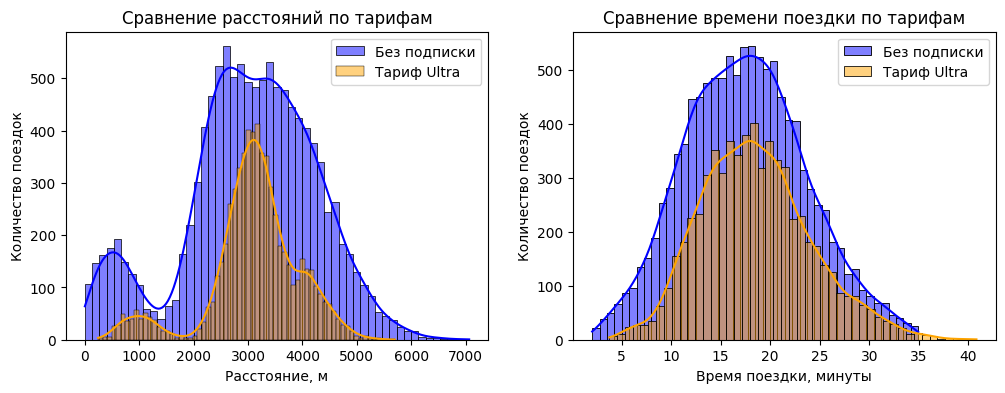

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# гистограмма расстояний
sns.histplot(data=free_sub, x='distance', kde=True, ax=axes[0], color='blue', label='Без подписки')
sns.histplot(data=ultra_sub, x='distance', kde=True, ax=axes[0], color='orange', label='Тариф Ultra')

# заголовок и подписи осей(расстояния)
axes[0].set_title('Сравнение расстояний по тарифам')
axes[0].set_xlabel('Расстояние, м')
axes[0].set_ylabel('Количество поездок')

# легенда(расстояния)
axes[0].legend()

# гистограмма времени поездок
sns.histplot(data=free_sub, x='duration', kde=True, ax=axes[1], color='blue', label='Без подписки')
sns.histplot(data=ultra_sub, x='duration', kde=True, ax=axes[1], color='orange', label='Тариф Ultra')

# заголовок и подписи осей(время)
axes[1].set_title('Сравнение времени поездки по тарифам')
axes[1].set_xlabel('Время поездки, минуты')
axes[1].set_ylabel('Количество поездок')

# легенда(время)
axes[1].legend()

plt.show()

**Вывод**

Объединили данные о пользователях, поездках и тарифах в один датафрейм - `full_data`.

Выделили два датафрейма на основе `full_data`:

>`free_sub` - Информация о пользователях с бесплатным тарифом

>`ultra_sub` - Информация о пользователях с платным тарифом
Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Анализируя данные по пользователям с разными тарифами, мы видим следующие закономерности:

**Без подписки**:

Пользователи с бесплатным тарифом склонны к долгим поездкам, часто превышая 10 минут, и многие из них проезжают от 2 до 5 километров, причем некоторые пользователи даже достигают 6 или 6.5 километров. Это может свидетельствовать о том, что для них важно удобство и доступность такси, и они могут использовать его для более длительных поездок, возможно, в рамках повседневных перемещений или деловых встреч.

**Тариф Ultra**:

В случае с платным тарифом, основное время поездки находится в промежутке от 15 до 25 минут. Пик расстояния, который приходится на 3 километра, указывает на то, что пользователи с этим тарифом вероятно используют такси для более коротких поездок, возможно, для передвижений по городу или для экономии времени в процессе поездки.

В целом, можно сделать вывод, что пользователи с бесплатным тарифом более склонны к долгим поездкам и более дальним расстояниям, в то время как пользователи с платным тарифом предпочитают более короткие поездки и оптимизацию времени.

## Подсчёт выручки

### Создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными

Ищем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [98]:
# округляем расстояния
data_united['duration'] = np.ceil(data_united['duration'])

In [99]:
# создаем таблицу с агрегированными данными
total_data = data_united.groupby(['month', 'user_id']).agg(
    distance=pd.NamedAgg(column='distance', aggfunc='sum'),
    duration=pd.NamedAgg(column='duration', aggfunc='sum'),
    subscription_type=pd.NamedAgg(column='subscription_type', aggfunc='min'),
    count_trips=pd.NamedAgg(column='name', aggfunc='count')
).reset_index()

In [100]:
# к сводной таблице присоединяем таблицу с подписками
total_data = total_data.merge(data_subs, on='subscription_type', how='left')

In [101]:
# сортируем по месяцу
total_data.sort_values(by='month').head()

,month,user_id,distance,duration,subscription_type,count_trips,minute_price,start_ride_price,subscription_fee
66,1,132,3431.825431,25.0,ultra,1,6,0,199
67,1,134,3472.323073,13.0,ultra,1,6,0,199
68,1,136,3076.212814,19.0,ultra,1,6,0,199
69,1,138,2971.122027,20.0,ultra,1,6,0,199
70,1,139,3152.419511,30.0,ultra,1,6,0,199


### Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь.

In [102]:
# функция для расчета рыручки
def revenue_per_month(row):
    revenue = row['start_ride_price'] * row['count_trips']# стоимость старта поездки за одну поездку
    revenue += row['duration'] * row['minute_price']  # стоимость по времени
    return revenue + row['subscription_fee']

In [103]:
# применяем функцию
total_data['revenue_per_month'] = total_data.apply(revenue_per_month, axis=1)

In [104]:
# группируем данные по пользователю и месяцу, и суммируем выручку
revenue_per_month = total_data.groupby(['user_id', 'subscription_type'])['revenue_per_month'].sum().reset_index()

In [105]:
total_data.query('user_id == 1')
total_data

,month,user_id,distance,duration,subscription_type,count_trips,minute_price,start_ride_price,subscription_fee,revenue_per_month
0,1,1,7027.511294,42.0,ultra,2,6,0,199,451.0
1,1,3,3061.777147,13.0,ultra,1,6,0,199,277.0
2,1,5,3914.646990,13.0,ultra,1,6,0,199,277.0
3,1,7,6478.080979,28.0,ultra,2,6,0,199,367.0
4,1,12,3577.151148,33.0,ultra,1,6,0,199,397.0
...,...,...,...,...,...,...,...,...,...,...
11295,12,1525,4597.854350,34.0,free,1,8,50,0,322.0
11296,12,1526,3644.121544,23.0,free,1,8,50,0,234.0
11297,12,1528,3998.569324,11.0,free,1,8,50,0,138.0
11298,12,1532,6111.889853,42.0,free,2,8,50,0,436.0


**Вывод**

*   Создан новый датафрейм total_data с агрегированными данными, сгруппированными по месяцам и пользователям
*   Посчитано суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц
*   Добавлен новый столбец  с помесячной выручкой, которую принес каждый пользователь

## Проверка гипотез

### Первая гипотеза:

> Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
 - H0: Пользователи с подпиской на сервис не тратят больше времени на поездки, чем пользователи без подписки.

 - H1: Пользователи с подпиской на сервис тратят больше времени на поездки, чем пользователи без подписки.

In [106]:
# проводим t-тест
ultra = ultra_sub['duration']
free = free_sub['duration']

t_stat, p_value, _ = sm.stats.ttest_ind(ultra, free, alternative='larger')

alpha = 0.05

if p_value < alpha:
    print('Гипотеза отвергнута')
else:
    print('Не удалось отвергнуть гипотезу')

Гипотеза отвергнута


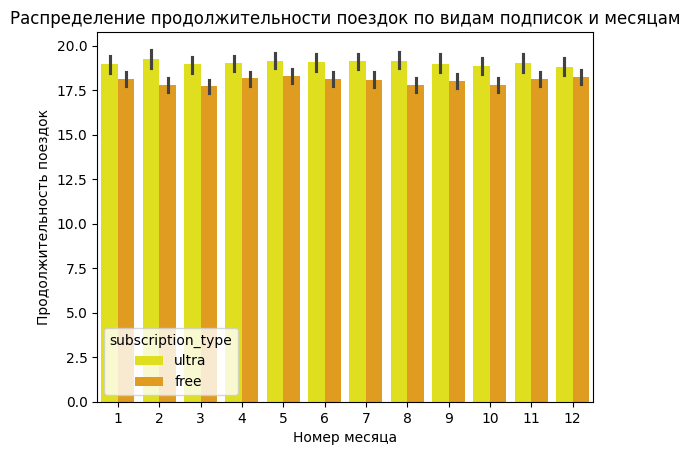

In [107]:
ax = sns.barplot(x = 'month', y = 'duration', hue = "subscription_type", data = data_united,
            palette = ['yellow', 'orange'])
ax.set(xlabel='Номер месяца', ylabel='Продолжительность поездок',
       title='Распределение продолжительности поездок по видам подписок и месяцам')
plt.show()

In [108]:
# выводим средние значения продолжительности поездок
average_duration = data_united.groupby('subscription_type')['duration'].mean()
average_duration

subscription_type
free     18.030855
ultra    19.037692
Name: duration, dtype: float64

**Вывод**

Гипотеза о том, что время поездки пользователей на тарифе **ultra** равно времени поездки пользователей на тарифе **free**, была проверена и отвергнута. Это означает, что существует статистически значимое различие во времени поездки между пользователями, подписанными на тариф **ultra**, и пользователями с тарифом **free**.

### Вторая гипотеза:

> Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
 - H0: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равна 3130 метров.
 - H1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [109]:
ultra_dist = ultra_sub['distance']

interested_value = 3130.0

alpha = .05

results = st.ttest_1samp(ultra_dist, interested_value, alternative='greater')

print(results.pvalue)

if (results.pvalue < alpha):
    print('Гипотеза отвергнута')
else:
    print('Не удалось отвергнуть гипотезу')

0.9195368847849785
Не удалось отвергнуть гипотезу


**Вывод**

В результате проведенного t-теста, мы исследовали гипотезу о среднем расстоянии, которое проезжают пользователи с подпиской за одну поездку, и оптимальном расстоянии в 3130 метров с точки зрения износа самоката. На основании полученных данных, мы не обнаружили статистически значимого доказательства того, что среднее расстояние, пройденное пользователями, превышает установленное оптимальное значение в 3130 метров.

### Третья гипотеза:

 - H0 Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.
 - H1 Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [110]:
ultra_per_mnth = total_data.loc[total_data.subscription_type == 'ultra', 'revenue_per_month']
free_per_mnth = total_data.loc[total_data.subscription_type == 'free', 'revenue_per_month']

results = st.ttest_ind(ultra_per_mnth, free_per_mnth, alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Гипотеза отвергнута')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.0314113674863288e-30
Гипотеза отвергнута


In [111]:
# выводим средние значения
average_revenue = total_data.groupby('subscription_type')['revenue_per_month'].mean()
average_revenue

subscription_type
free     329.332644
ultra    362.792191
Name: revenue_per_month, dtype: float64

**Вывод**

Гипотеза, которая была выдвинута, состояла в том, что помесячная выручка от пользователей с тарифом **ultra**, равна выручке от пользователей, использующих серис без подписки. Однако, после проведения t-теста, результаты не подтвердили данную гипотезу.

### Четвертая гипотеза:

> Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.Какой тест вам понадобился бы для проверки этой гипотезы?
Есть два массива данных: `before_update` и `after_update`, где каждый элемент соответствует количеству обращений.


```python
# Выполнение t-теста для зависимых (парных) выборок
t_statistic, p_value = stats.ttest_rel(before_update, after_update, alternative='greater')

# Вывод результатов
if p_value < 0.05:  # Уровень значимости 0.05
    print("Существует статистически значимая разница между количеством обращений до и после обновления.")
else:
    print("Нет статистически значимой разницы между количеством обращений до и после обновления.")
```


Ответ на вопрос:  t-тест для сравнения средних значений двух парных выборок.

**Вывод** проведенного исследования

**> Изучили общую информацию:**

1. Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках;

2. проверили данные на пропуски, их не оказалось ни в одной таблице;
3. поменяли тип данных у столбца date из датафрейма **data_rides** к типу даты;
4. добавили столбец **month** с номером месяца. И удалили дубликаты строк из датафрейма с пользователями.

**> Провели исследовательский анализ данных:**

1. вывели, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.
2. пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.
3. возраст пользователей укладывается в промежуток от 20 до 30 лет
В основном пользователи проезжают от 2.5 км до 4 км.
4. чаще всего длительность поездки состовляет 13 - 22 минут
5. объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:

>>для пользователей с ultra подпиской;

>>для пользователей с free подпиской.

Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.

- Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.
- Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.
7. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм **total_data**. Добавили в датафрейм **total_data** столбец с помесячной выручкой **revenue_per_month**.

8. Проверили гипотезы:

- Пользователи с подпиской не тратят больше времени на поездки, чем пользователи на бесплатном тарифе. *Отвергли нулевую гипотезу*.
- Пользователи с подпиской проезжают расстояние 3130 метров за одну поездку. *Не удалось отвергнуть нулевую гипотезу*.
- Помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки. *Отвергли нулевую гипотезу*.